#### Coding Samurai Internship Project - Task_3: Exploratory Data Analysis (EDA) on Titanic Dataset  
##### This project explores the Titanic dataset to uncover patterns and insights that influenced passenger survival. The workflow includes:  
- Data Cleaning  
- Handling Missing Values  
- Handling Outliers  
- Basic Statistics  
- Univariate Analysis  
- Bivariate Analysis  
- Correlation Analysis  
- Final Insights  

In [2]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv(r'C:\Users\hp\OneDrive\Documents\projects\CODING_SAMURAI_INTERNSHIP_TASK\Task_1 Titanic\titanic_data\titanic_train\train.csv')

# Display first few rows
df.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### 1. Data Overview  
Started by checking dataset dimensions, column information, and missing values.

In [3]:
# Dataset info
df.info()

# Shape of dataset
print("\nShape of dataset:", df.shape)

# Missing values
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Shape of dataset: (891, 12)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin  

##### 2. Handling Missing Values  
- `Age`: Impute missing values with **median** (because it's skewed).  
- `Embarked`: Fill with **mode** (most common port).  
- `Cabin`: Droped due to too many missing values.

In [4]:
# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11508\664583355.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_11508\664583355.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

###### Dataset is ready

In [5]:
# Cheking again for missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### 3. Handling Outliers  
Checking for outliers in `Fare` using the **Interquartile Range (IQR)** method and caping extreme values.

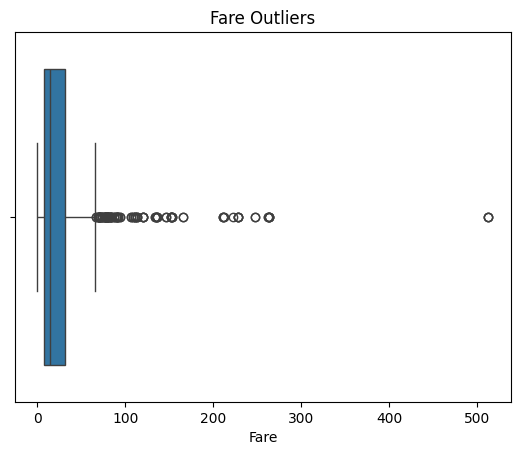

In [6]:
sns.boxplot(x=df['Fare'])
plt.title("Fare Outliers")
plt.show()

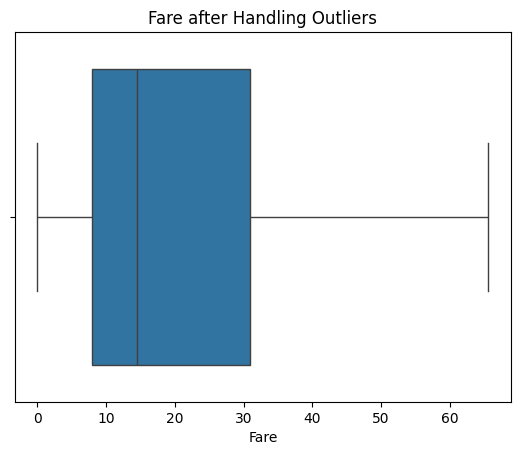

In [7]:
# Handling Outliers in Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Cap the outliers
df['Fare'] = np.where(df['Fare'] > upper_bound, upper_bound,
                      np.where(df['Fare'] < lower_bound, lower_bound, df['Fare']))

# Checking again
sns.boxplot(x=df['Fare'])
plt.title("Fare after Handling Outliers")
plt.show()

##### 4. Basic Statistics  
Descriptive statistics to understand central tendency and spread.

In [8]:
# Descriptive statistics
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,24.046813,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,20.481625,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


##### 5. Univariate Analysis  
Exploring single variables like **Age, Fare, Sex, and Survived**.

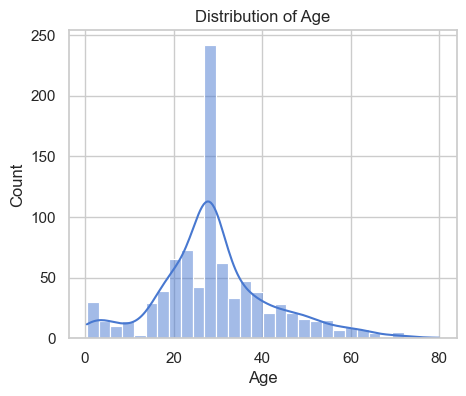

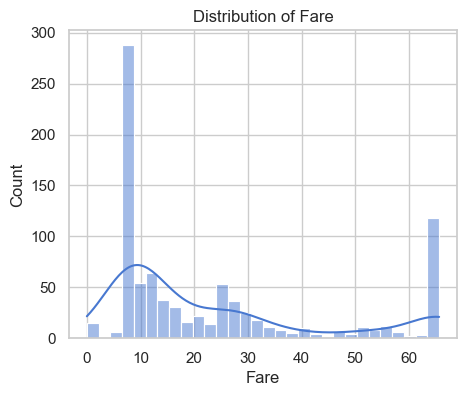

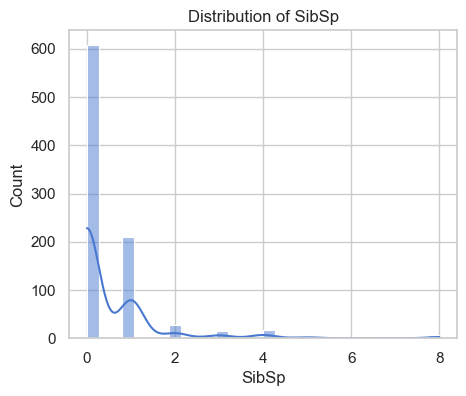

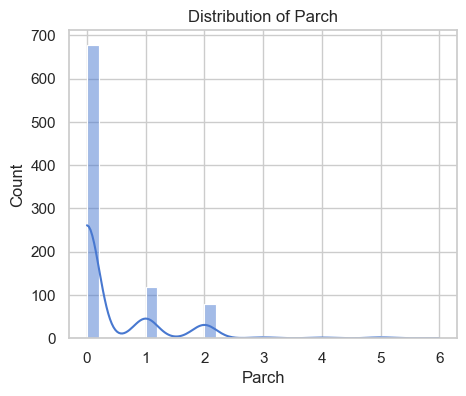

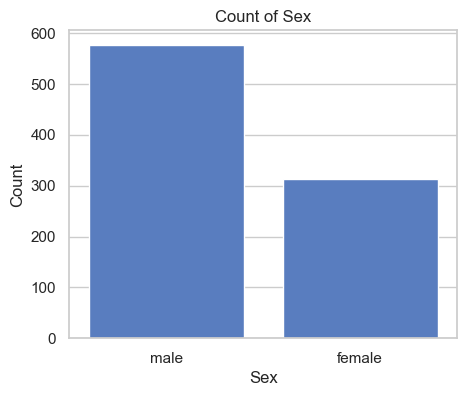

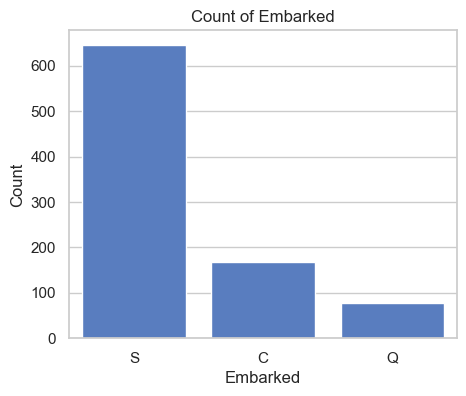

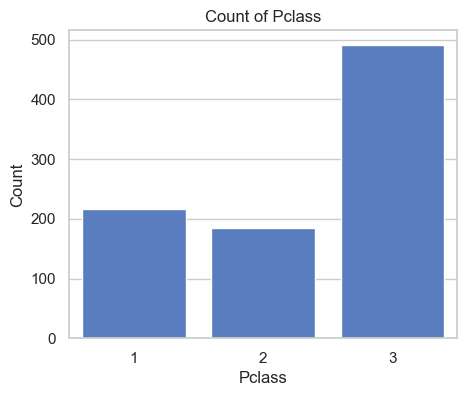

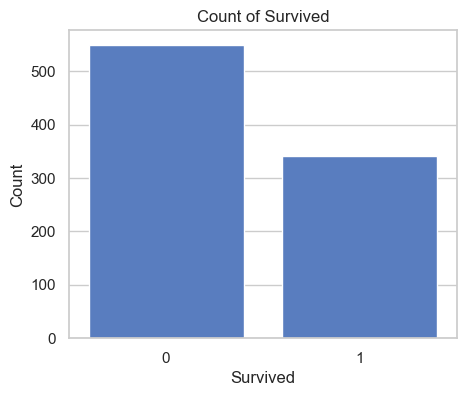

In [9]:
# Aesthetics
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (5,4)

# Numerical
numerical_cols = ['Age', 'Fare', 'SibSp','Parch']
for col in numerical_cols:
    plt.figure(figsize=(5, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Categorical
categorical_cols = ['Sex', 'Embarked', 'Pclass', 'Survived']
for col in categorical_cols:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

###### Univariate Analysis — Overall Insights
- ###### The age distribution is centered on **young adults (≈20–40)**; fewer **children** and **elderly**.
- ###### **Fare** is **right-skewed** (many low fares, few very high values).
- ###### **Family counts** (`SibSp`, `Parch`) are mostly **0–1**; large families are rare.
- ###### There are **more males** than females on board.
- ###### Most passengers **embarked at S** (Southampton).
- ###### **3rd class** has the **largest** number of passengers.
- ###### Most passengers **did not survive**.

##### 6. Bivariate Analysis  
Checking the relationship between **features and target feature(survival)**.

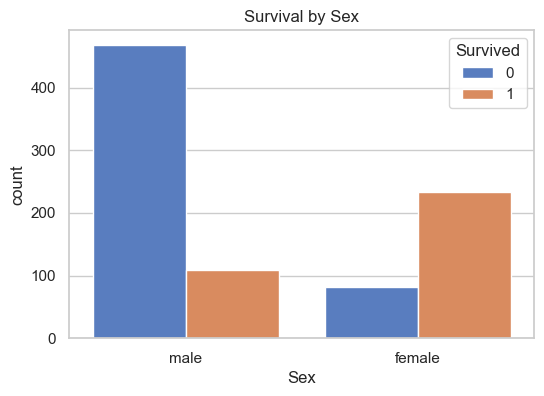

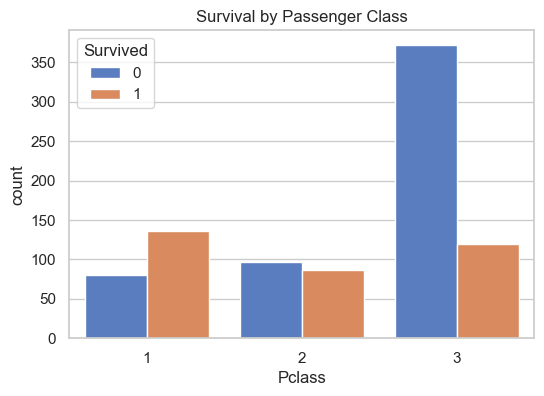

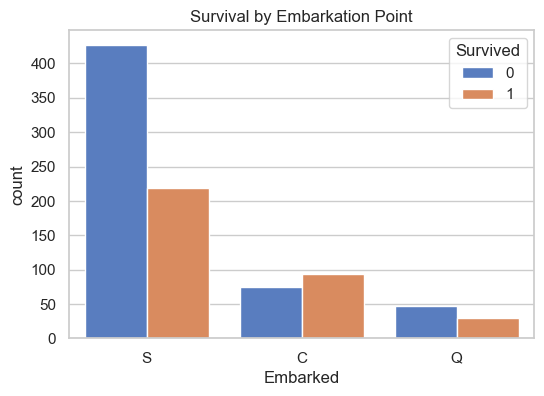

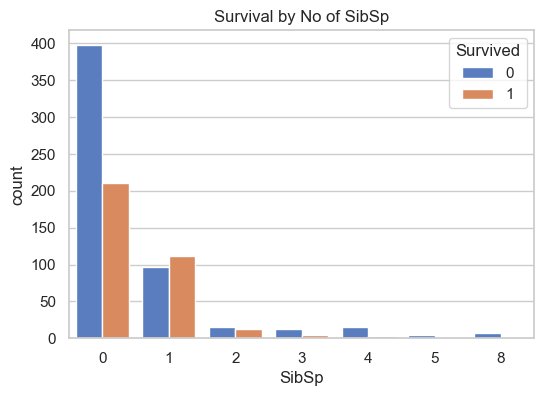

In [10]:
# Survival vs Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Sex")
plt.show()

# Survival vs Pclass
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

# Survival vs Embarked
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival by Embarkation Point")
plt.show()

# Survival vs SibSp
plt.figure(figsize=(6,4))
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title("Survival by No of SibSp")
plt.show()

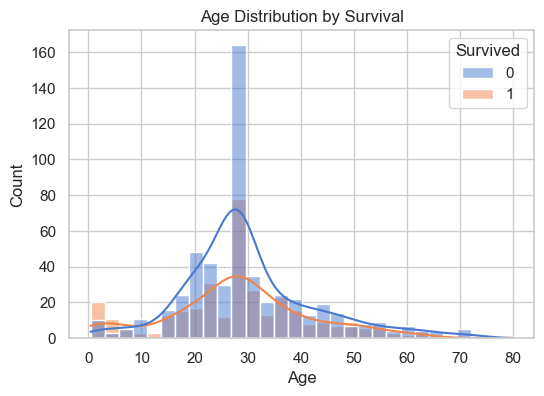

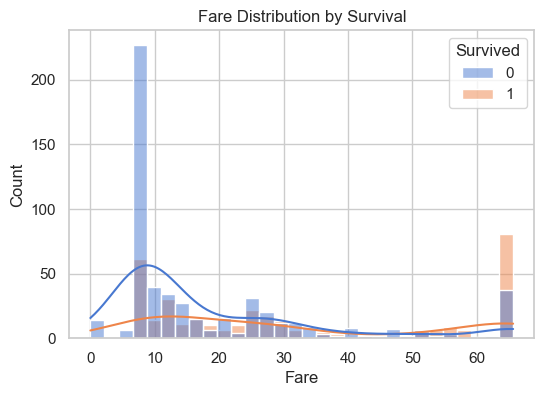

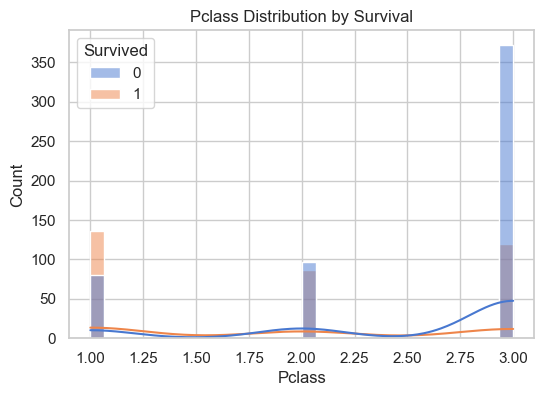

In [11]:
# Age vs Survival
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()

# Fare vs Survival
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, bins=30)
plt.title("Fare Distribution by Survival")
plt.show()

# Pclass vs Survival
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Pclass', hue='Survived', kde=True, bins=30)
plt.title("Pclass Distribution by Survival")
plt.show()

###### Bivariate Analysis — Overall Insights (Feature ↔ Survival)
- ###### **Gender matters:** **Females** show a **much higher** survival rate than males.
- ###### **Class matters:** **1st class** passengers survived **more** than 2nd and 3rd class.
- ###### **Fare relates to survival:** Survivors tend to have **higher fares** on average.
- ###### **Age pattern:** **Children** show **better** survival; the overall linear link with age is weak.
- ###### **Family context:** Moderate family presence can help; very large groups or traveling alone may be less favorable.

###### Multivariate Analysis

##### 7. Correlation Matrix  
To check correlations between numeric variables to identify linear relationships.

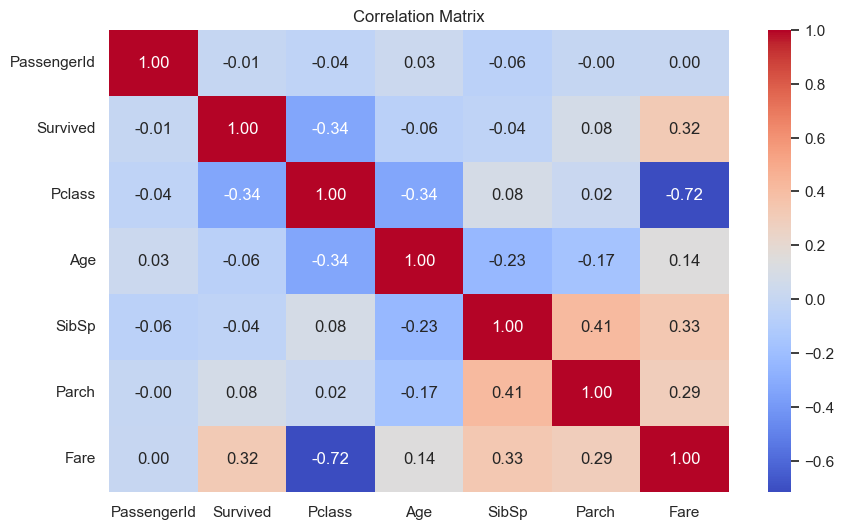

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

###### 🔥 Correlation Heatmap — Overall Insights (Numeric Only)
- ###### **`Pclass` ↔ `Fare`:** clear **negative** correlation (higher class number → lower fare).
- ###### **`Fare` ↔ `Survived`:** **positive** correlation (higher fare → higher survival).
- ###### **`Pclass` ↔ `Survived`:** **negative** correlation (3rd class → lower survival).
- ###### **`SibSp` ↔ `Parch`:** **positive** correlation (family members travel together).
- ###### **`Age` ↔ `Survived`:** near **zero** overall (nonlinear effects like children aren’t captured by correlation).

##### 8. Final Insights  
- **Gender:** Women had a higher survival rate compared to men.  
- **Pclass:** Passengers in 1st class survived more often than those in 3rd class.  
- **Age:** Younger passengers had slightly better chances of survival.  
- **Fare:** Higher fares (wealthier passengers) were associated with higher survival.  
- **Missing Values:** Age was imputed with median, Embarked with mode, and Cabin dropped.  
- **Outliers:** Fare outliers were capped to prevent skewing the analysis.  

This EDA provides a strong foundation for **feature engineering and predictive modeling** in the next step.
